In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SAVE_DATA = False

In [3]:
(X, y), (X_test, y_test) = mnist.load_data()

X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

X = X.reshape((*X.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

## **Build Dataset**

In [4]:
spliter = StratifiedShuffleSplit(n_splits=1, test_size=X_test.shape[0], random_state=123)
for train_idx, test_idx in spliter.split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[test_idx], y[test_idx]

print(f"Train data shape: {X_train.shape} Val data shape: {X_val.shape} Test data shape: {X_test.shape}")

Train data shape: (50000, 28, 28, 1) Val data shape: (10000, 28, 28, 1) Test data shape: (10000, 28, 28, 1)


## **Simple EDA**

### **Subset Category Distribtions**

In [5]:
def show_category_distribution(data, subset):
    df = pd.DataFrame(data, columns=['Category'])
    viz = sns.catplot(data=df, x='Category', kind='count')
    plt.title(subset)

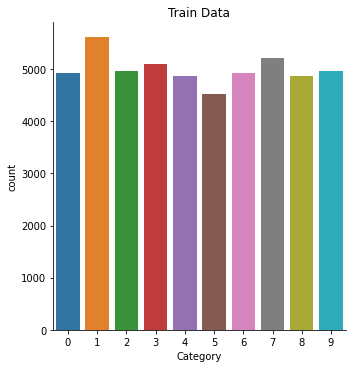

In [6]:
show_category_distribution(y_train, 'Train Data')

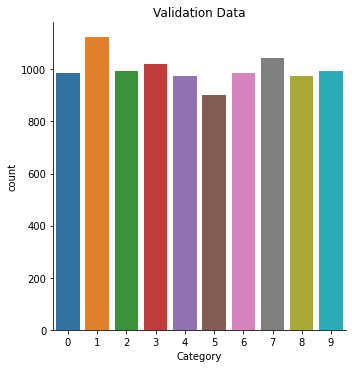

In [7]:
show_category_distribution(y_val, 'Validation Data')

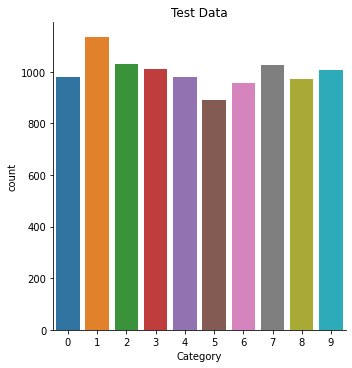

In [8]:
show_category_distribution(y_test, 'Test Data')

### **Image Category Tonicity by Subset**

This will help ensure that the mean and standard deviation of image tonicities between classes is similar between the train, validation, and test sets. This ensures that the data splitting has not created some arbitrary division in the style of images and that (at least from a very high level view) the training data is a good representation of all types of images we will encounter "in the wild".

In [16]:
import sys
def calculate_image_tonicity_by_category(images, labels, subset):
    categories, tonicities = [], []
    for cat in range(10):
        mask = np.where(labels==cat)[0]
        for idx in mask:
            categories.append(cat)
            tonicities.append(np.mean(images[idx, :, :, :]))
    df = pd.DataFrame({'Category': categories, 'Tonicity': tonicities, 'Subset': [subset for _ in range(len(categories))]})
    fig, ax = plt.subplots(figsize=(11.7, 8.0))
    sns.boxplot(x="Category", y="Tonicity", data=df, ax=ax)
    plt.title(subset)
    return df

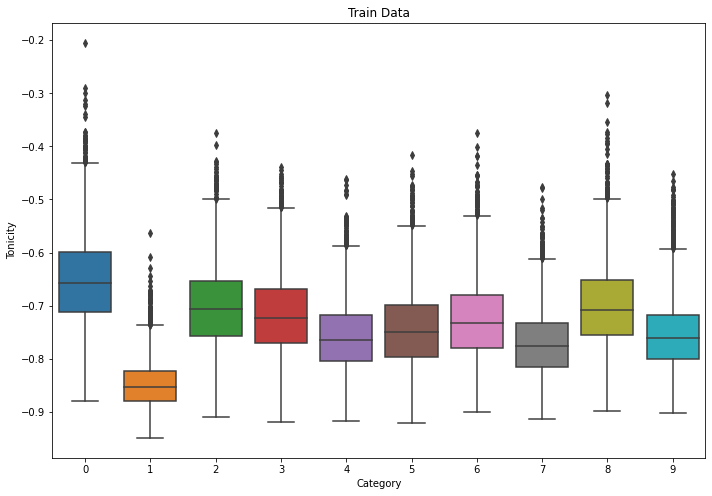

In [17]:
train_df = calculate_image_tonicity_by_category(X_train, y_train, 'Train Data')

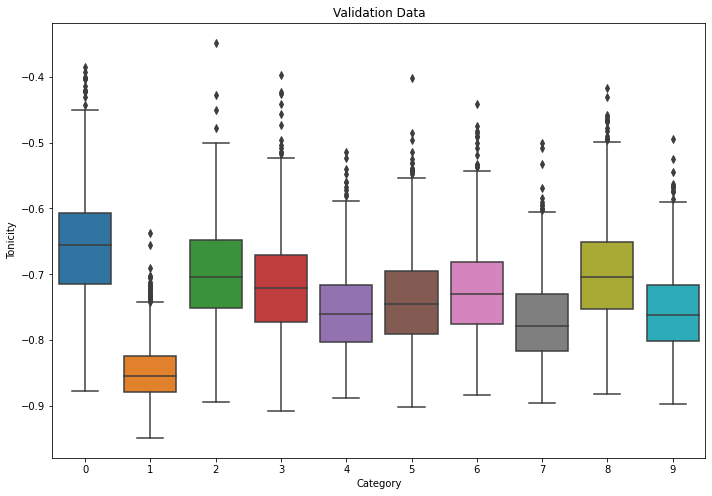

In [18]:
val_df = calculate_image_tonicity_by_category(X_val, y_val, 'Validation Data')

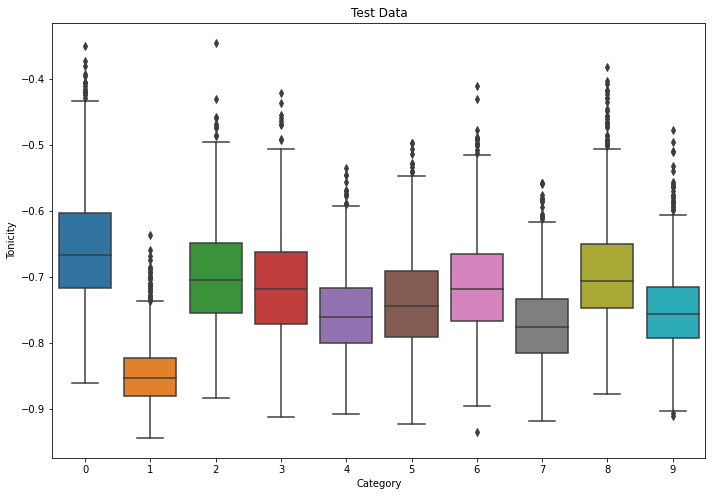

In [19]:
test_df = calculate_image_tonicity_by_category(X_test, y_test, 'Test Data')

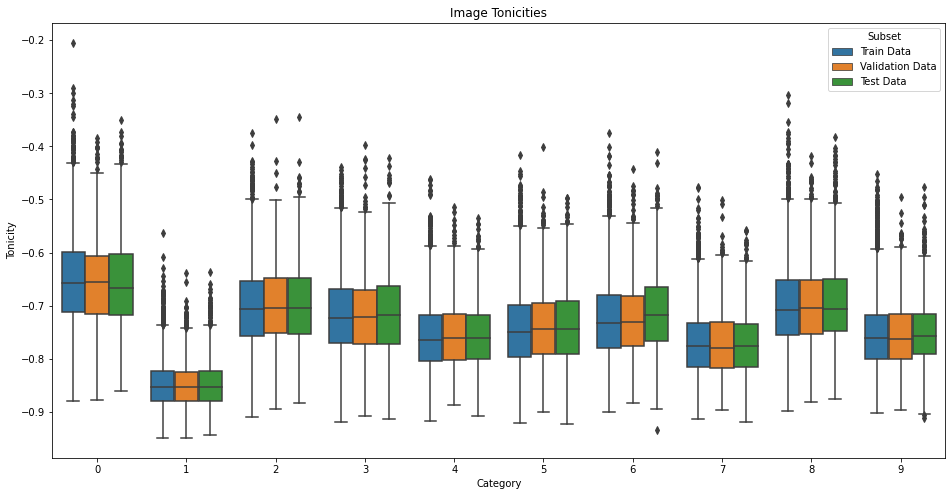

In [22]:
combined_df = pd.concat([train_df, val_df, test_df])
fig, ax = plt.subplots(figsize=(16.0, 8.0))
sns.boxplot(x="Category", y="Tonicity", hue="Subset", data=combined_df, ax=ax)
plt.title("Image Tonicities");

## **Save the data to folder**

In [14]:
if(SAVE_DATA):
    with open('data/train.npy', mode='wb') as outfile:
        np.save(outfile, X_train, allow_pickle=True)
        np.save(outfile, y_train, allow_pickle=True)

    with open('data/val.npy', mode='wb') as outfile:
        np.save(outfile, X_val, allow_pickle=True)
        np.save(outfile, y_val, allow_pickle=True)

    with open('data/test.npy', mode='wb') as outfile:
        np.save(outfile, X_test, allow_pickle=True)
        np.save(outfile, y_test, allow_pickle=True)